In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import sklearn

plt.style.use('seaborn')

# Datos en las columnas
# ------------------------------
Edad (discreta), Sexo (categorica), Tipo de dolor de pecho (4 posibles dolores, categorica), Presion sanguinea (continua),
Colesterol (mg/dl) (continua), azucar en sangre mayor a 120mg/dl (categorica), resultado electrocardiograma (categorica), frecuencia cardiaca maxima (continua), angina inducida por ejercicio (categorica), st depression ? (continua), slope (categorica), radioscopia (categorica), thal (categorica 3 valores), enfermedad del corazon (categorica - target -> modelo de clasificacion)

In [4]:
# carga csv

heart_csv = pd.read_csv("heart.csv")
heart_csv.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
heart_csv['target'] = heart_csv['target'].astype('category')
heart_csv['sex'] = heart_csv['sex'].astype('category')
heart_csv['cp'] = heart_csv['cp'].astype('category')
heart_csv['fbs'] = heart_csv['fbs'].astype('category')
heart_csv['restecg'] = heart_csv['restecg'].astype('category')
heart_csv['fbs'] = heart_csv['fbs'].astype('category')
heart_csv['exang'] = heart_csv['exang'].astype('category')
heart_csv['slope'] = heart_csv['slope'].astype('category')
heart_csv['ca'] = heart_csv['ca'].astype('category')
heart_csv['thal'] = heart_csv['thal'].astype('category')
heart_csv['target'] = heart_csv['target'].astype('category')

heart_csv.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

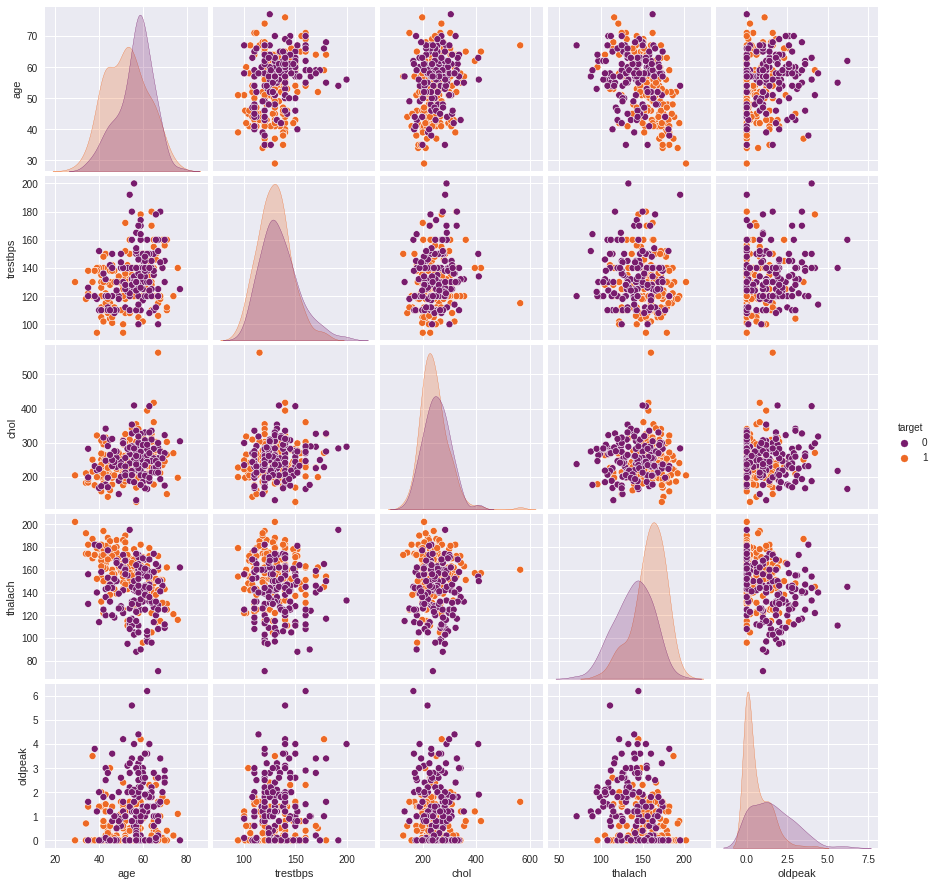

In [9]:
# pairplot de las variables mas llamativas
p = sns.color_palette('inferno', n_colors=2)
sns.pairplot(heart_csv, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target', palette=p)

<AxesSubplot:xlabel='fbs', ylabel='count'>

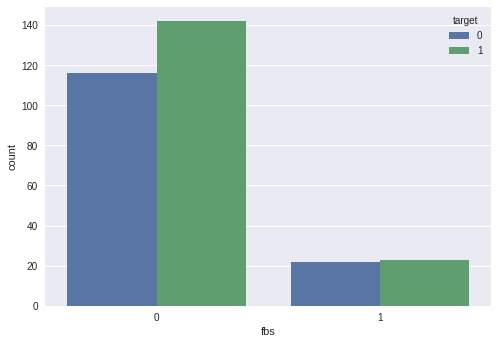

In [58]:
sns.countplot(x="fbs", hue='target', data=heart_csv)

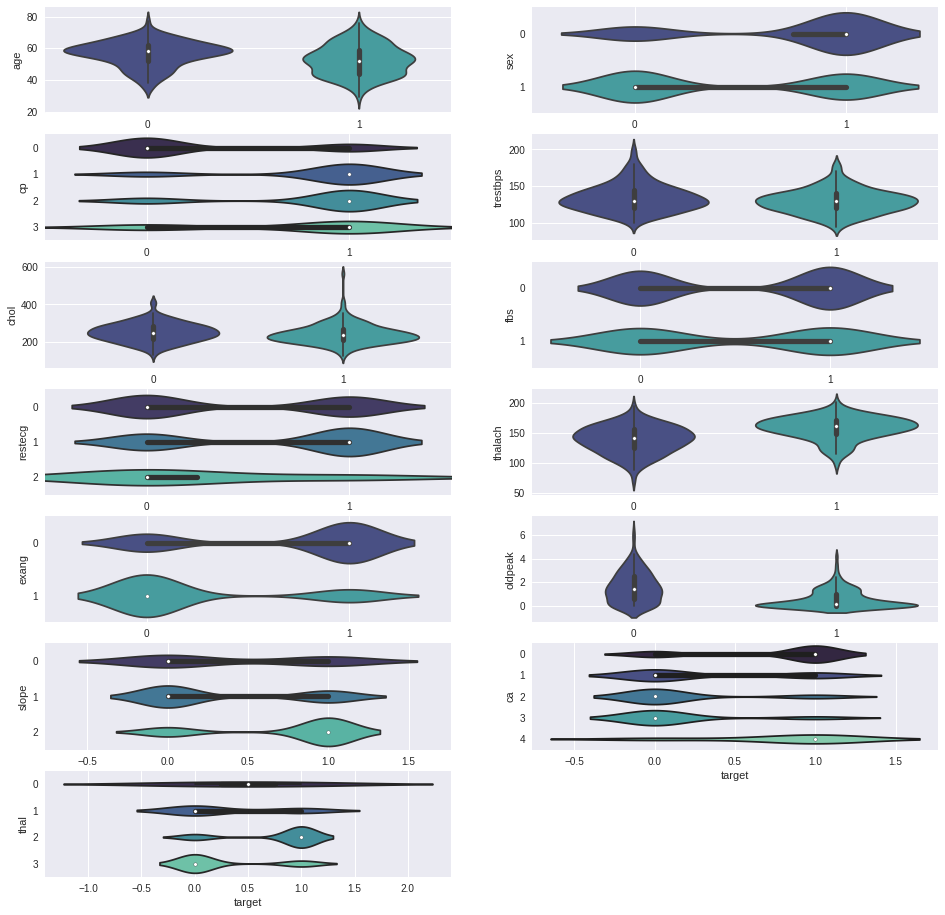

In [5]:
# violin plots 

fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(16, 16), sharex='row')
ax = iter(tuple(x for sublist in axs.tolist() for x in sublist))
violins = lambda x: (sns.violinplot(y=heart_csv[x], x=heart_csv['target'], ax = next(ax), palette='mako') if x != "target" else None)
res = map(violins, list(heart_csv.columns))
a = list(res)
fig = plt.gcf()
fig.delaxes(axs[6][1])
plt.savefig("violinplots.png")

<AxesSubplot:xlabel='trestbps', ylabel='target'>

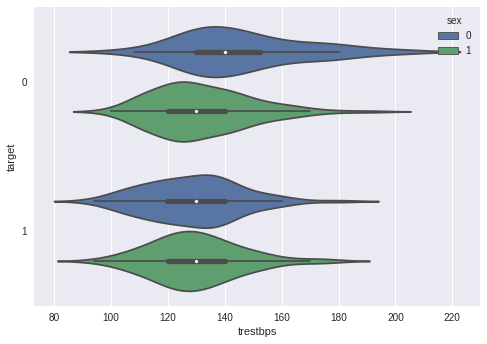

In [165]:
sns.violinplot(y=heart_csv['target'].astype('category'), x=heart_csv['trestbps'], hue=heart_csv['sex'])

In [147]:
heart_csv.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

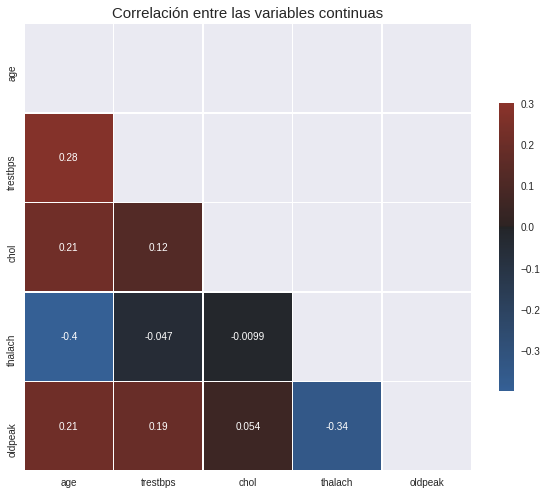

In [62]:
# matriz de correlaciones 

corr_matrix = heart_csv.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=40,

                                  n=9, center="dark", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f.set_tight_layout({"pad": .0})
plt.title("Correlación entre las variables continuas", fontsize=15)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig('Correlation.png', dpi=600)

In [48]:
heart_csv.loc[(heart_csv.chol > heart_csv.chol.mean()) & (heart_csv.thalach > heart_csv.thalach.mean()) & (heart_csv.fbs == 0),:].target.value_counts()

1    43
0    19
Name: target, dtype: int64

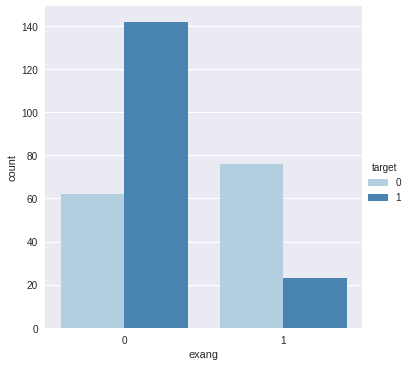

In [180]:
p = sns.color_palette('Blues',2)
sns.catplot(x="exang", kind="count", palette=p, data=heart_csv, hue='target')

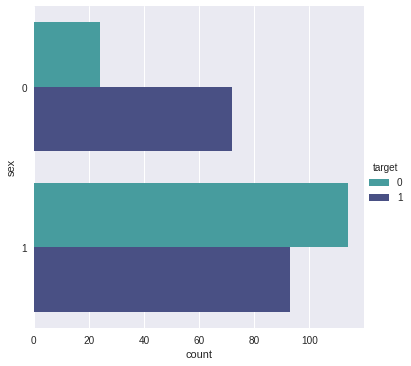

In [102]:
sns.catplot(y="sex", kind="count", palette="mako_r", data=heart_csv, hue='target')

# Modelo 1 - Regresion Logistica

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# para las variables categoricas (no las binarias) necesitamos alguna manera de encodearlas
# one-hot encoding o dummy variables (ONE HOT NUNCA PARA ESTOS MODELOS PQ LA MATRIZ ES SINGULAR)

# corazon tonto 
dummy_heart = pd.get_dummies(heart_csv, columns=['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# split 70 / 30
X_train, X_test, y_train, y_test = train_test_split(dummy_heart.drop('target', axis=1), dummy_heart['target'], test_size = 0.3, random_state=23)


X_train.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,38,1,138,175,0,173,0,0.0,0,1,...,0,0,1,0,0,0,1,0,1,0
260,66,0,178,228,1,165,1,1.0,0,0,...,0,1,0,0,1,0,0,0,0,1
124,39,0,94,199,0,179,0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0
110,64,0,180,325,0,154,1,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
13,64,1,110,211,0,144,1,1.8,0,0,...,0,1,0,0,0,0,0,0,1,0


In [6]:
# download csv para mas comodidad 
dummy_heart.to_csv('dummy_heart.csv', index=False)

In [212]:
# Veintitres

# primer modelo sin penalizacion  
# probaremos penalizacion l1 (| |), l2 (| |^2), elastic net (both of 'em)
lr = LogisticRegression(random_state=23, penalty='none', max_iter=1000, solver='newton-cg')

# la columna ca_4 hace que la convergencia del modelo sea pesima, la dropeamos momentaneamente (son todos 0's menos unos 5 1's)

#X_train = X_train.drop('ca_4', axis=1)
#X_test = X_test.drop('ca_4', axis=1)

# fiteamos la regresion logistica
lr.fit(X_train, y_train)

predicciones = lr.predict(X_test)


# el score en este caso es el accuracy (el loss es cross entropy...)
score = (predicciones == y_test).sum() / predicciones.size

print('Accuracy Regresion Logística: {}.\n'.format(score))

print(lr.coef_)

Accuracy Regresion Logística: 0.8461538461538461.

[[ 4.98474479e-02 -1.62949965e+00 -3.44542003e-02 -2.57854022e-03
   4.70748506e-01  1.88497730e-02 -1.00767303e+00 -2.42382893e-01
   1.16429714e+00  2.09071001e+00  2.26153424e+00  6.71782656e-01
  -8.07398545e-01 -6.66244876e-01  5.22624922e-01 -1.78200856e+00
  -3.40747246e+00 -2.65748121e+00 -7.21772315e+00 -6.73578748e+00
  -8.30225969e+00]]


In [213]:
lr.intercept_

array([8.53839731])

In [88]:
# quiero usar otra libreria que me de un poco mas de rigurosidad estadistica (aunque scikit-learn es muy buena para casi todo)

import statsmodels.api as sm

# la columna ca_4 hace que la convergencia del modelo sea pesima, la dropeamos momentaneamente (son todos 0's menos unos 5 1's)

#X_train = X_train.drop('ca_4', axis=1)
#X_test = X_test.drop('ca_4', axis=1)


logit_stats = sm.Logit(exog=np.asarray(X_train).astype('float'), endog=y_train).fit(maxiter = 1000, method='minimize')

Optimization terminated successfully.
         Current function value: 0.295333
         Iterations: 135
         Function evaluations: 139
         Gradient evaluations: 139


In [85]:
# ligeramente inferior al de scikit learn (pero tenemos un bello summary)
# falta agregar regularizacion!
probabilidades_estimadas = logit_stats.predict(np.asarray(X_test).astype('float'))

predicciones = list(map(round, probabilidades_estimadas))
acc = (predicciones == y_test).sum() / y_test.size

print('Accuracy Regresion Logística (statsmodels): {}.\n'.format(acc))
logit_stats.summary()

Accuracy Regresion Logística (statsmodels): 0.8681318681318682.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                           20
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                  0.5538
Time:                        19:44:47   Log-Likelihood:                -64.955
converged:                       True   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 4.283e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0524      0.031      1.717      0.086      -0.007       0.112
x2            -1.6269      0.737     -2.207      0.027      -3.071      -0.182
x3            -0.0340      0.014     -2.494      0.013      -0.061      -0.007
x4            -0.0024      0.005     -0.463      0.643      -0.013       0.008
x5             0.4597      0.714      0.644      0.520      -0.940       1.859
x6             0.0204      0.015      1.329      0.184      -0.010       0.050
x7            -1.0006      0.537     -1.865      0.062      -2.052       0.051
x8            -0.2349      0.283     -0.829      0.407      -0.790       0.320
x9             1.1611      0.704      1.650      0.099      -0.218       2.540
x10            2.1064      0.621      3.392      0.001       0.889       3.324
x11            2.2684      0.848      2.675      0.007       0.607       3.930
x12            0.6754      0.489      1.382      0.167      -0.282       1.633
x13           -0.8014      3.105     -0.258      0.796      -6.886       5.283
x14           -0.6257      0.926     -0.676      0.499      -2.440       1.189
x15            0.5717      1.016      0.563      0.574      -1.420       2.563
x16           -1.7854      0.640     -2.790      0.005      -3.040      -0.531
x17           -3.4360      0.921     -3.731      0.000      -5.241      -1.631
x18           -2.6691      1.174     -2.274      0.023      -4.970      -0.368
x19            0.8205      3.121      0.263      0.793      -5.297       6.937
x20            1.2834      3.024      0.424      0.671      -4.643       7.210
x21           -0.2867      3.095     -0.093      0.926      -6.353       5.780
==============================================================================
"""

In [107]:
# ca_4 no es significativa
X_train.drop('ca_4', axis = 1, inplace = True)
X_test.drop('ca_4', axis = 1, inplace = True)

In [84]:
def interacciones(col_1, col_2, drop = True):
    nombre_col = str(col_1) + '_' + str(col_2)
    X_train.insert(X_train.shape[1], nombre_col, X_train[str(col_1)].astype('float') * X_train[str(col_2)].astype('float'))
    X_test.insert(X_test.shape[1], nombre_col, X_test[str(col_1)].astype('float') * X_test[str(col_2)].astype('float'))
    
    
    logit_stats = sm.Logit(exog=np.asarray(X_train).astype('float'), endog=y_train).fit(maxiter = 1000, method='minimize')
    probabilidades_estimadas = logit_stats.predict(np.asarray(X_test).astype('float'))

    predicciones = list(map(round, probabilidades_estimadas))
    acc = (predicciones == y_test).sum() / y_test.size

    print('Accuracy Regresion Logística (statsmodels) con columnas: {} y {}: {}.\n'.format(col_1, col_2, acc))
    print(logit_stats.summary())
    if drop:
        X_train.drop(str(nombre_col), axis=1, inplace=True)
        X_test.drop(str(nombre_col), axis=1, inplace=True)

In [93]:
X_train.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_3',
       'oldpeak_slope_2'],
      dtype='object')

In [92]:
interacciones('oldpeak', 'slope_2', False)

Optimization terminated successfully.
         Current function value: 0.295333
         Iterations: 135
         Function evaluations: 139
         Gradient evaluations: 139
Accuracy Regresion Logística (statsmodels) con columnas: oldpeak y slope_2: 0.8901098901098901.

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                           21
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                  0.5699
Time:                        19:46:01   Log-Likelihood:                -62.611
converged:                       True   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 1.556e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

In [177]:
# que pasa si por ejemplo considero la interaccion entre el nivel de colesterol en sangre y el hecho de que el azucar en sangre es mayor a 120mg/dl?
# no es muy interesante
interacciones('chol', 'fbs')

Optimization terminated successfully.
         Current function value: 0.303849
         Iterations: 158
         Function evaluations: 161
         Gradient evaluations: 161
Accuracy Regresion Logística (statsmodels) con columnas: chol y fbs: 0.8681318681318682.

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                           21
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:                  0.5575
Time:                        13:52:40   Log-Likelihood:                -64.416
converged:                       True   LL-Null:                       -145.59
Covariance Type:            nonrobust   LLR p-value:                 7.702e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------

# Regresion logistica con penalizacion 

In [106]:
# elastic net 
#C = k * 1/lambda
#C es inversamente proporcional a lambda
#recuerdo qeu si aumento lambda (disminuyo C) aumenta la regularizacion
max_acc = -1
best_c = -1
best_l1 = -1
lista_hp = []
cs = np.logspace(-1.5, 1, 5)
l1_ratios = np.linspace(0, 1, 100)
for l1 in l1_ratios:
    for c in cs:
        modelo = LogisticRegression(random_state=23, penalty='elasticnet', max_iter = 10000, solver = 'saga', l1_ratio = l1, C=c)
        modelo.fit(X_train, y_train)
        preds = modelo.predict(X_test)
        acc = np.mean(preds == y_test)
        if acc > max_acc:
            max_acc = acc
            best_c = c
            best_l1 = l1
        lista_hp.append((acc, c, 1))
        #print("Acc = {}, c = {}, l1 = {}".format(acc,c, l1))
        
print("Acc = {}, c = {}, l1 = {}".format(max_acc,best_c, best_l1))

# con este setup se consiguen los mejores resultados a partir de l1_ratio = 0 (solo penalizacion l2)
# c = 0.10979899497487436, acc = 83.51648351648352 % 
# literal converge a esa accuracy

KeyboardInterrupt: 

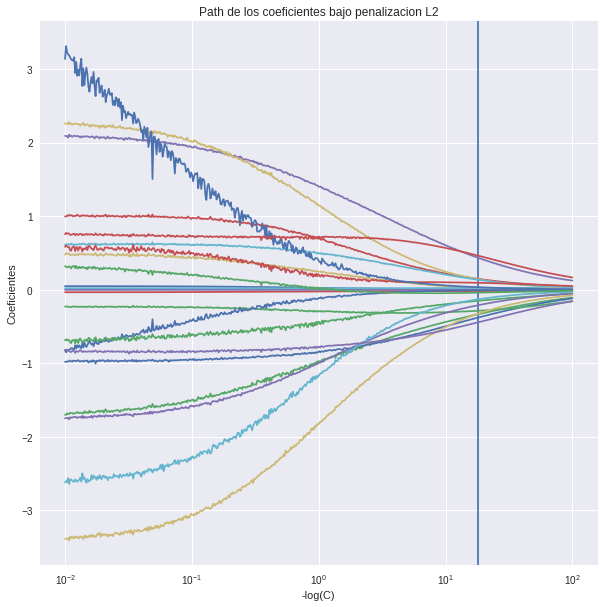

0.8901098901098901 0.05565330778427646


In [135]:
# regularizacion l2
# por default tiene regularizacion l2
cs = np.logspace(-2, 2, 500)
model_coefs = []
max_acc = -1
best_c = -1
best_model = None
for c in cs:
    modelo_l2 = LogisticRegression(random_state = 23, penalty='l2', max_iter = 5000, C=c)
    modelo_l2.fit(X_train, y_train)
    preds = modelo_l2.predict(X_test)
    acc = np.mean(preds == y_test)
    if max_acc < acc:
        max_acc = acc
        best_c = c
        best_model = modelo_l2
    model_coefs.append(modelo_l2.coef_.ravel().copy())
    
cs = np.array(list(map(lambda x: 1/(x), cs)))
model_coefs = np.array(model_coefs)


plt.figure(figsize=(10,10))
ax = plt.gca()
plt.axvline(x = 1/best_c, ymin = -3, ymax = 3)
ax.plot(cs, model_coefs)
plt.xscale('log')
plt.xlabel('-log(C)')
plt.ylabel('Coeficientes')
plt.title('Path de los coeficientes bajo penalizacion L2')
plt.axis('tight')

plt.savefig('Penalizacion_l2.png')
plt.show()

print(max_acc, best_c)

In [131]:
best_model.coef_

array([[ 0.00056153, -0.33418913, -0.01843406, -0.00138036,  0.02391598,
         0.02290481, -0.37985983, -0.28681652,  0.14774444,  0.43527392,
         0.1429588 ,  0.13616951, -0.00671703, -0.15092371,  0.09416124,
        -0.21143117, -0.32668993, -0.13100145,  0.03416753, -0.04057679,
         0.46453776, -0.44517984]])

In [144]:
np.mean(y_train == best_model.predict(X_train))

0.8254716981132075

In [117]:
coefs_l2 = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(best_model.coef_))], axis = 1)
coefs_l2

,0,0
0,age,0.000562
1,sex,-0.334189
2,trestbps,-0.018434
3,chol,-0.001380
4,fbs,0.023916
5,thalach,0.022905
6,exang,-0.379860
7,oldpeak,-0.286817
8,cp_1,0.147744
9,cp_2,0.435274


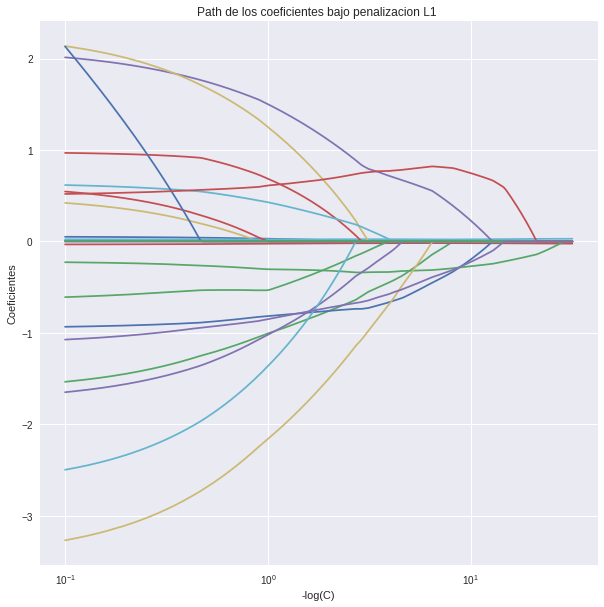

0.9010989010989011 1.3987131026472386


In [145]:
# regularizacion l1
# liblinear es bueno para sets chiquitos y funciona con l1 
# mejor modelo hasta ahora

cs = np.logspace(-1.5, 1, 200)
model_coefs = []
max_acc = -1
best_c = -1
best_model = None
for c in cs:
    modelo_l1 = LogisticRegression(random_state = 23, penalty='l1', max_iter = 100, solver = 'liblinear', C=c)
    modelo_l1.fit(X_train, y_train)
    preds = modelo_l1.predict(X_test)
    acc = np.mean(preds == y_test)
    if max_acc < acc:
        max_acc = acc
        best_c = c
        best_model = modelo_l1
    model_coefs.append(modelo_l1.coef_.ravel().copy())

cs = np.array(list(map(lambda x: 1/(x), cs)))
model_coefs = np.array(model_coefs)


plt.figure(figsize=(10,10))
ax = plt.gca()

ax.plot(cs, model_coefs)
ax.set_xscale('log')

plt.xlabel('-log(C)')
plt.ylabel('Coeficientes')
plt.title('Path de los coeficientes bajo penalizacion L1 ')
plt.axis('tight')
plt.savefig('Penalizacion_l1.png')
plt.show()

print(max_acc, best_c)

In [191]:
np.mean(y_train == (best_model.predict_proba(X_train)[:,1] >= 0.513).astype('int'))

0.8679245283018868

In [50]:
# vemos que l1 mata a ca_4 (la que introduce problemas en la convergencia del modelo)
# mata tambien a thal_1 (tambien introduce problemas)
# idem restecg_2


,0,0
0,age,0.035579
1,sex,-1.124004
2,trestbps,-0.026853
3,chol,-0.001608
4,fbs,0.079312
5,thalach,0.022784
6,exang,-0.849305
7,oldpeak,-0.283893
8,cp_1,0.805349
9,cp_2,1.634487


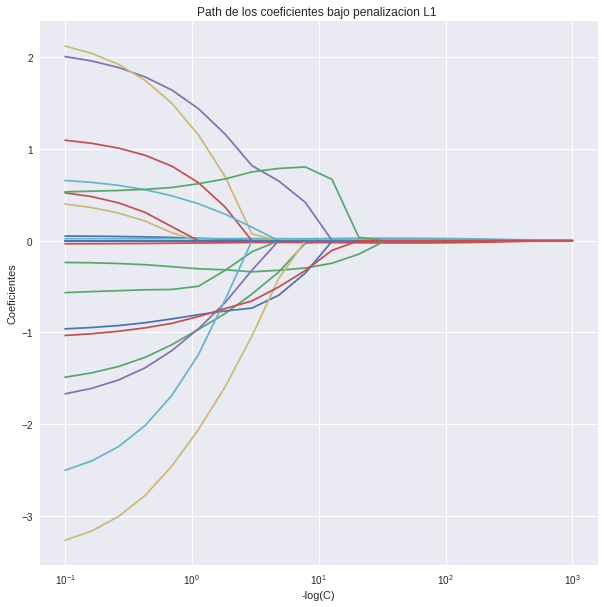

0.9010989010989011 1.438449888287663 [0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724 1.        ]


In [142]:
# regularizacion utilizando un dataframe con interacciones

cs = np.logspace(-3, 1, 20)
l_ratios = np.linspace(0, 1, 20)
model_coefs = []
max_acc = -1
best_c = -1
best_model = None
best_l = 0
for c in cs:
    modelo_l1 = LogisticRegression(random_state = 23, penalty='l1', max_iter = 1000, solver = 'liblinear', C=c)
    modelo_l1.fit(X_train, y_train)
    preds = modelo_l1.predict(X_test)
    acc = np.mean(preds == y_test)
    if max_acc < acc:
        max_acc = acc
        best_c = c
        best_model = modelo_l1
        best_l = l1
    model_coefs.append(modelo_l1.coef_.ravel().copy())

cs = np.array(list(map(lambda x: 1/(x), cs)))
model_coefs = np.array(model_coefs)


plt.figure(figsize=(10,10))
ax = plt.gca()

ax.plot(cs, model_coefs)
ax.set_xscale('log')

plt.xlabel('-log(C)')
plt.ylabel('Coeficientes')
plt.title('Path de los coeficientes bajo penalizacion L1 ')
plt.axis('tight')

plt.show()

print(max_acc, best_c, best_l)

In [139]:
cs = np.logspace(-3, 1, 20)

In [143]:
best_model.coef_

array([[ 3.60112403e-02, -1.13325475e+00, -2.69984147e-02,
        -1.61999217e-03,  8.80376899e-02,  2.27717657e-02,
        -8.52084311e-01, -2.82314359e-01,  8.13712503e-01,
         1.64403375e+00,  1.50014107e+00,  4.90463156e-01,
         0.00000000e+00, -5.30786341e-01,  1.53254249e-01,
        -1.19806348e+00, -2.45730773e+00, -1.68697114e+00,
         0.00000000e+00,  5.80941803e-01, -9.00582991e-01]])

In [193]:
# cross validation sobre los c's y l1

from sklearn.linear_model import LogisticRegressionCV

# cross validation con Cs valores para C entre 1e-04 y 1e+04, 15 folds 
# n_jobs = -1 para que use pueda usar todos los cores posibles
l1 = np.linspace(0, 1, 30)
lrcv = LogisticRegressionCV(Cs=100, max_iter = 1000, n_jobs=-1, penalty="l1", solver='liblinear',cv=15, refit=True)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, cv=15, max_iter=1000, n_jobs=-1, penalty='l1',
                     solver='liblinear')

In [222]:
np.mean(y_test== (lrcv.predict_proba(X_test)[:, 1] >= 0.464))

0.9010989010989011

In [226]:
lrcv.coef_

array([[ 4.00271845e-02, -1.21991282e+00, -2.83404160e-02,
        -1.73330960e-03,  1.68561406e-01,  2.26735961e-02,
        -8.78411033e-01, -2.68356997e-01,  8.89703961e-01,
         1.73383955e+00,  1.65755840e+00,  5.32093292e-01,
         0.00000000e+00, -5.31802916e-01,  2.52947524e-01,
        -1.31663364e+00, -2.65900005e+00, -1.89484436e+00,
         0.00000000e+00,  0.00000000e+00,  5.67968476e-01,
        -9.31316515e-01]])

In [140]:
X_train.head(1)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
163,38,1,138,175,0,173,0,0.0,0,1,...,1,0,0,1,0,0,0,0,1,0


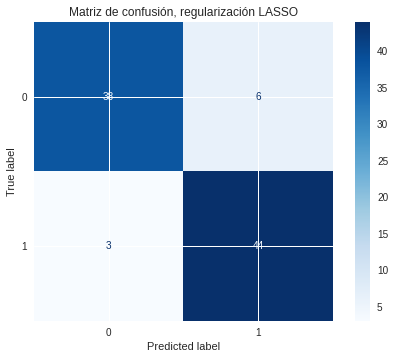

In [234]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_true = y_test, y_pred = lrcv.predict(X_test))


plot_confusion_matrix(lrcv, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Matriz de confusión, regularización LASSO')
plt.savefig('conf_mat.png')

In [239]:
# cross validation sobre los c's y l1

from sklearn.linear_model import LogisticRegressionCV

# cross validation con Cs valores para C entre 1e-04 y 1e+04, 15 folds 
# n_jobs = -1 para que use pueda usar todos los cores posibles
l1 = np.linspace(0, 1, 30)
lrcv = LogisticRegressionCV(Cs=10, max_iter = 10000, n_jobs=-1, penalty="elasticnet", solver='saga',cv=15, refit=True, l1_ratios = np.linspace(0, 1, 10))
lrcv.fit(X_train, y_train)

LogisticRegressionCV(cv=15,
                     l1_ratios=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                     max_iter=10000, n_jobs=-1, penalty='elasticnet',
                     solver='saga')

In [254]:
lrcv.scores_

{1: array([[[0.73333333, 0.53333333, 0.53333333, ..., 0.53333333,
          0.53333333, 0.53333333],
         [0.73333333, 0.66666667, 0.53333333, ..., 0.53333333,
          0.53333333, 0.53333333],
         [0.73333333, 0.73333333, 0.73333333, ..., 0.73333333,
          0.73333333, 0.66666667],
         ...,
         [0.8       , 0.8       , 0.8       , ..., 0.8       ,
          0.8       , 0.8       ],
         [0.8       , 0.8       , 0.8       , ..., 0.8       ,
          0.8       , 0.8       ],
         [0.8       , 0.8       , 0.8       , ..., 0.8       ,
          0.8       , 0.8       ]],
 
        [[0.66666667, 0.53333333, 0.53333333, ..., 0.53333333,
          0.53333333, 0.46666667],
         [0.53333333, 0.66666667, 0.6       , ..., 0.53333333,
          0.53333333, 0.53333333],
         [0.53333333, 0.53333333, 0.6       , ..., 0.73333333,
          0.66666667, 0.66666667],
         ...,
         [0.73333333, 0.73333333, 0.66666667, ..., 0.53333333,
          0.53333333,

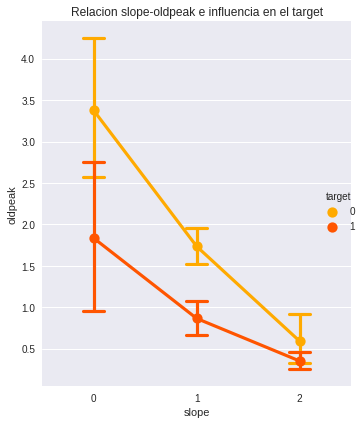

In [103]:
sns.catplot(x="slope", y="oldpeak", hue = "target",
                capsize=.2, palette='autumn_r',height=6, aspect=.75,
                kind="point", data=heart_csv)
plt.title("Relacion slope-oldpeak e influencia en el target")

plt.tight_layout()
plt.savefig('slope_oldpeak.png')